In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_data = pd.read_csv("diabetes_prediction_dataset.csv")

In [4]:
df_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
#Selecionando 10 mil linhas aleatoriamente
df_amostra = df_data.sample(n= 10000, random_state=42)

In [7]:
df_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

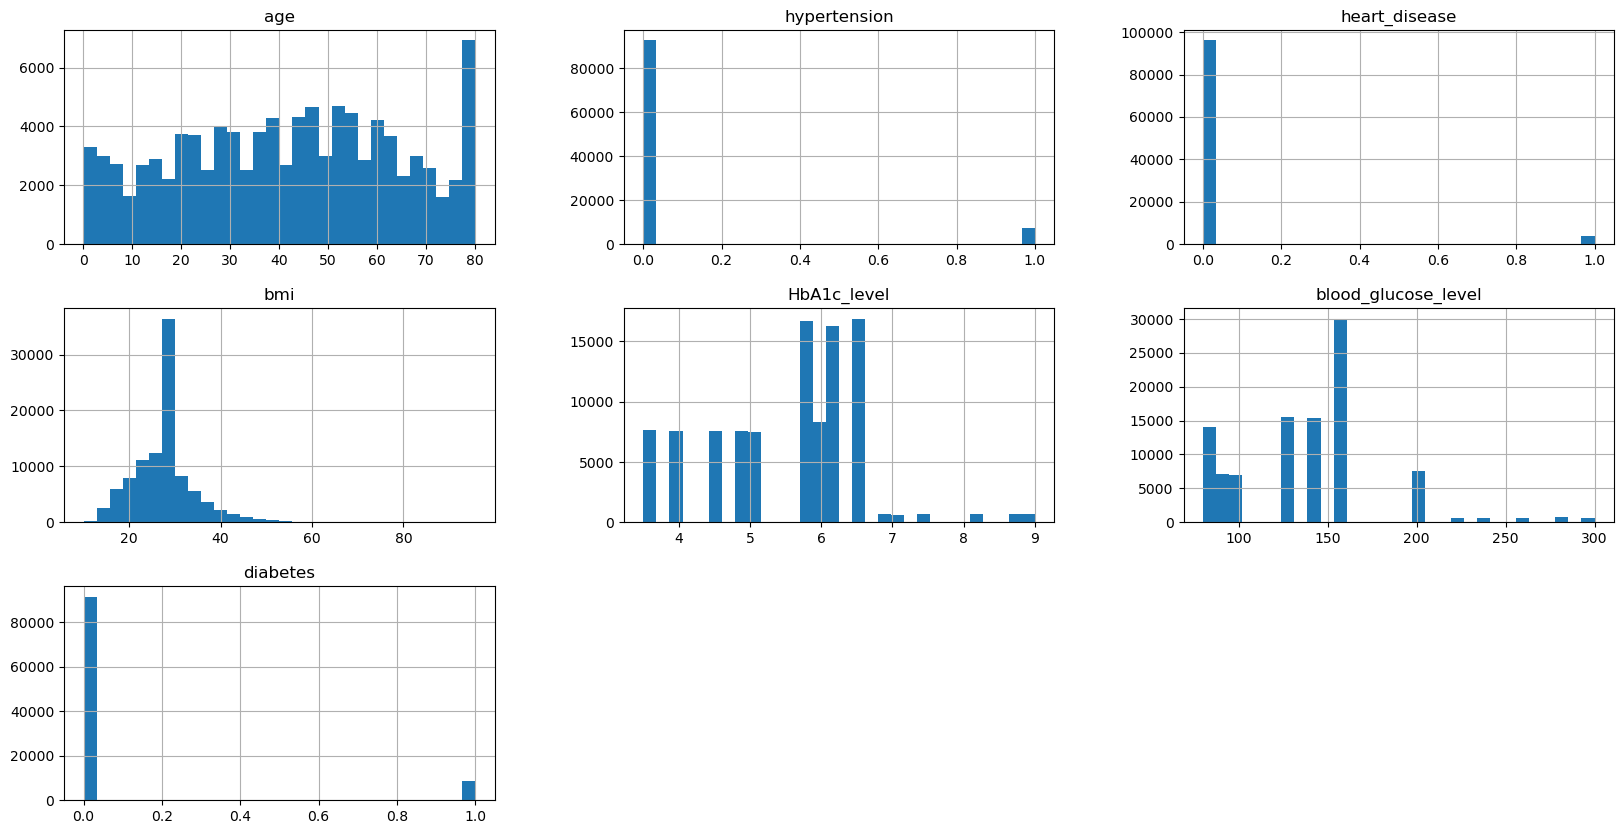

In [8]:
df_data.hist(bins= 30, figsize=(20,10))

In [9]:
df_data["diabetes"].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [10]:
df_amostra['diabetes'].value_counts()

diabetes
0    9137
1     863
Name: count, dtype: int64

In [76]:
df_data['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [12]:
df_correlacao = df_data.drop(columns=['smoking_history', 'gender'])
df_correlacao.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [13]:
df_correlacao.corr()['diabetes'].sort_values(ascending=False)

diabetes               1.000000
blood_glucose_level    0.419558
HbA1c_level            0.400660
age                    0.258008
bmi                    0.214357
hypertension           0.197823
heart_disease          0.171727
Name: diabetes, dtype: float64

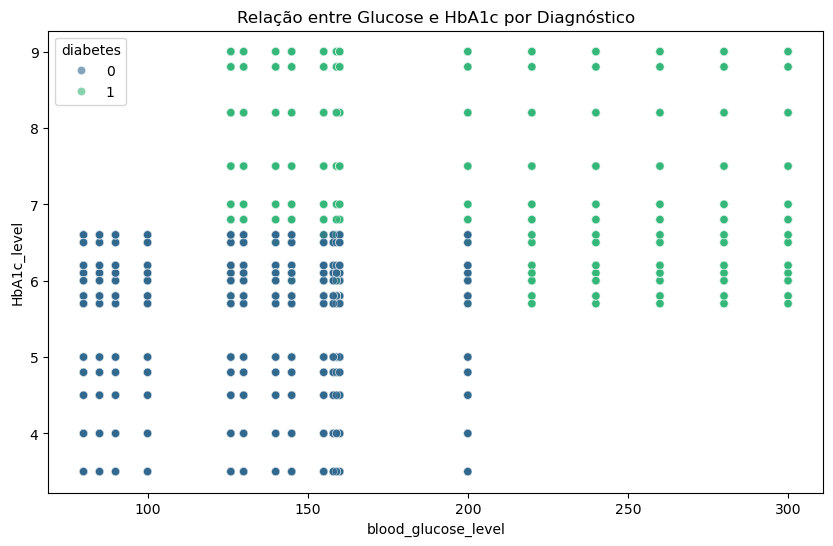

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_data, 
    x='blood_glucose_level', 
    y='HbA1c_level', 
    hue='diabetes', 
    palette='viridis',
    alpha=0.6
)
plt.title('Relação entre Glucose e HbA1c por Diagnóstico')
plt.show()

## Preparacao dos dados para o modelo

In [69]:
from sklearn.preprocessing import OneHotEncoder

encoder_gender = OneHotEncoder(sparse_output=False)
encoder_smoking = OneHotEncoder(sparse_output=False)
gender_1hot = encoder_gender.fit_transform(df_data[['gender']])
smoking_1hot = encoder_smoking.fit_transform(df_data[['smoking_history']])

In [72]:
gender_1hot_df = pd.DataFrame(gender_1hot, columns=encoder_gender.get_feature_names_out(['gender']))
smoking_1hot_df = pd.DataFrame(smoking_1hot, columns=encoder_smoking.get_feature_names_out(['smoking_history']))

In [74]:
df_encoded = df_data.drop(['gender','smoking_history'], axis=1)
df_encoded = df_encoded.join([gender_1hot_df,smoking_1hot_df])
df_encoded

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54.0,0,0,27.32,6.6,80,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,28.0,0,0,27.32,5.7,158,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36.0,0,0,23.45,5.0,155,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,76.0,1,1,20.14,4.8,155,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99996,2.0,0,0,17.37,6.5,100,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99997,66.0,0,0,27.83,5.7,155,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,24.0,0,0,35.42,4.0,100,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
